In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = lambda x: '$ {:,.2f}'.format(x).replace(',', '|').replace('.', ',').replace('|', '.')
ID_planilla = '1IS5tbmHwNqbk_CEnRPncqECW2_4ePE9qDUgvlBCRIpA'

URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='

# ADQUISICIÓN DE LOS DATOS

## Dataframes en crudo

In [ ]:
df_sales_in_paraguay = pd.read_csv(URL + 'sales_in_Paraguay', dtype=str)

df_distributors_profiles = pd.read_csv(URL + 'distributors_profiles', dtype=str)

df_exports_to_paraguay = pd.read_csv(URL + 'exports_to_Paraguay', dtype=str)

df_locations_profiles = pd.read_csv(URL + 'locations_profiles', dtype=str)

# PREPARACIÓN DE LOS DATOS

## Sales in Paraguay

In [ ]:
#1 Explorar datos sales_in_Paraguay
print(df_sales_in_paraguay.info())

#2 Eliminar datos no deseados
df_sales_in_paraguay.drop([44,], inplace = True)


#3 Cambiar formato
sales_in_paraguay_fields = ['distributor','Rubber','Brass','Vinyl','Granite','Stone','Brick','Aluminum','Glass','Plexiglass','Steel', 'Wood','Plastic']

df_sales_in_paraguay['distributor'] = df_sales_in_paraguay['distributor'].astype(int)

for field in sales_in_paraguay_fields[1:]:
    df_sales_in_paraguay[field] = df_sales_in_paraguay[field].str.replace('[$.]', '', regex=True).str.replace(',', '.', regex=True).astype(float)

df_sales_in_paraguay.set_index('distributor', inplace=True)

display(df_sales_in_paraguay)

print(df_sales_in_paraguay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  44 non-null     object
 1   Rubber       45 non-null     object
 2   Brass        45 non-null     object
 3   Vinyl        45 non-null     object
 4   Granite      45 non-null     object
 5   Stone        45 non-null     object
 6   Brick        45 non-null     object
 7   Aluminum     45 non-null     object
 8   Glass        45 non-null     object
 9   Plexiglass   45 non-null     object
 10  Steel        45 non-null     object
 11  Wood         45 non-null     object
 12  Plastic      45 non-null     object
dtypes: object(13)
memory usage: 4.7+ KB
None


,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
distributor,,,,,,,,,,,,
583,"$ 54.510.203,61","$ 45.268.636,86","$ 51.579.748,25","$ 21.780.180,58","$ 26.576.776,52","$ 0,00","$ 55.872.547,77","$ 18.050.385,12","$ 178.927.599,01","$ 2.788,80","$ 54.510.203,61","$ 20.982,80"
1104,"$ 32.438.788,20","$ 25.837.100,49","$ 36.603.264,50","$ 21.883.374,92","$ 1.473.437,08","$ 0,00","$ 46.239.695,30","$ 33.102.840,61","$ 35.563.624,11","$ 599,01","$ 9.945.371,16","$ 187.306,41"
1384,"$ 21.780.180,58","$ 78.927.599,01","$ 25.837.100,49","$ 33.102.840,61","$ 51.579.748,25","$ 0,00","$ 21.883.374,92","$ 78.927.599,01","$ 1.346.769,34","$ 0,00","$ 36.603.264,50","$ 300.838,58"
379,"$ 79.358.855,35","$ 90.185.311,22","$ 45.268.636,86","$ 54.510.203,61","$ 59.358.855,35","$ 0,00","$ 79.358.855,35","$ 32.067.534,68","$ 53.172.624,14","$ 2.922,94","$ 33.102.840,61","$ 579.748,25"
1599,"$ 11.758.005,07","$ 21.780.180,58","$ 57.187.306,41","$ 9.945.371,16","$ 32.067.534,68","$ 0,00","$ 53.172.624,14","$ 57.187.306,41","$ 1.155.872.547,77","$ 203,61","$ 43.512.922,94","$ 730.734,07"
1062,"$ 90.185.311,22","$ 43.512.922,94","$ 11.758.005,07","$ 76.443.998,86","$ 36.999.867,09","$ 23.012,00","$ 51.673.437,08","$ 61.236.075,66","$ 165.978.582,24","$ 840,61","$ 27.179.878,86","$ 780.180,58"
1679,"$ 78.927.599,01","$ 57.187.306,41","$ 41.899.590,44","$ 18.050.385,12","$ 20.344.007,84","$ 0,00","$ 35.563.624,11","$ 90.185.311,22","$ 121.883.374,92","$ 855,35","$ 11.758.005,07","$ 883.374,92"
1302,"$ 5.662.736,92","$ 59.862.809,01","$ 46.239.695,30","$ 90.185.311,22","$ 36.603.264,50","$ 0,00","$ 81.812.951,32","$ 57.009.912,25","$ 42.411.396,23","$ 6,86","$ 35.563.624,11","$ 899.590,44"
565,"$ 57.009.912,25","$ 53.172.624,14","$ 36.999.867,09","$ 59.199.680,31","$ 78.927.599,01","$ 12.548,00","$ 42.411.396,23","$ 55.872.547,77","$ 25.837.100,49","$ 82,23","$ 22.300.838,58","$ 1.346.769,34"


<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 583 to 29
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rubber      44 non-null     float64
 1   Brass       44 non-null     float64
 2   Vinyl       44 non-null     float64
 3   Granite     44 non-null     float64
 4   Stone       44 non-null     float64
 5   Brick       44 non-null     float64
 6   Aluminum    44 non-null     float64
 7   Glass       44 non-null     float64
 8   Plexiglass  44 non-null     float64
 9   Steel       44 non-null     float64
 10  Wood        44 non-null     float64
 11  Plastic     44 non-null     float64
dtypes: float64(12)
memory usage: 4.5 KB
None


## Distributors profiles

In [ ]:
#1 Explorar datos distributors_profiles)
print(df_distributors_profiles.info())

#2 Eliminar datos no deseados
df_distributors_profiles = df_distributors_profiles[df_distributors_profiles.id.notna()]

# #3 Cambiar formato
df_distributors_profiles['id'] = df_distributors_profiles['id'].replace({'\.': ''}, regex=True).astype(int)
df_distributors_profiles['years in the construction market'] = df_distributors_profiles['years in the construction market'].astype(int)

df_distributors_profiles.set_index('id', inplace=True)

display(df_distributors_profiles)
print(df_distributors_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                44 non-null     object
 1   distributor                       44 non-null     object
 2   distributor activities            44 non-null     object
 3   years in the construction market  46 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB
None


<ipython-input-4-f051725bf316>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distributors_profiles['id'] = df_distributors_profiles['id'].replace({'\.': ''}, regex=True).astype(int)
<ipython-input-4-f051725bf316>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distributors_profiles['years in the construction market'] = df_distributors_profiles['years in the construction market'].astype(int)


,distributor,distributor activities,years in the construction market
id,,,
565,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1384,Balistreri LLC,"construction materials import/distribution, si...",22
1183,Brekke-Stiedemann,construction materials import/distribution,13
1526,Collins LLC,construction materials import/distribution,12
29,Cummings-Ward,"construction materials import/distribution, ir...",23
1055,"Cummings, Kemmer and Walker","construction materials import/distribution, co...",23
1093,"Davis, Kiehn and Heller","construction materials import/distribution, ne...",12
920,"Denesik, Schmidt and Wyman","construction materials import/distribution, zi...",18
1062,"Feil, MacGyver and Schamberger","construction materials import/distribution, \n...",20


<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 565 to 1679
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   distributor                       44 non-null     object
 1   distributor activities            44 non-null     object
 2   years in the construction market  44 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ KB
None


## Exports to Paraguay


In [ ]:
#1 Explorar datos exports_to_paraguay
print(df_exports_to_paraguay.info())

#2 Eliminar datos no deseados
df_exports_to_paraguay.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Columnas'], inplace=True)

#Eliminar duplicados
df_exports_to_paraguay.drop_duplicates(inplace=True)

#3 Cambiar formato
df_exports_to_paraguay['distributor'] = df_exports_to_paraguay['distributor'].replace({'\.': ''}, regex=True).astype(int)

exports_to_paraguay_fields = ['distributor','Rubber','Brass','Vinyl','Granite','Stone','Brick','Aluminum','Glass','Plexiglass','Steel', 'Wood','Plastic']

for field in exports_to_paraguay_fields[1:]:
    df_exports_to_paraguay[field] = df_exports_to_paraguay[field].str.replace('[$.]', '', regex=True).str.replace(',', '.', regex=True).astype(float)

df_exports_to_paraguay.set_index('distributor', inplace=True)

display(df_exports_to_paraguay)
print(df_exports_to_paraguay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   distributor  46 non-null     object
 1   Rubber       46 non-null     object
 2   Brass        46 non-null     object
 3   Vinyl        46 non-null     object
 4   Granite      46 non-null     object
 5   Stone        46 non-null     object
 6   Brick        46 non-null     object
 7   Aluminum     46 non-null     object
 8   Glass        46 non-null     object
 9   Plexiglass   46 non-null     object
 10  Steel        46 non-null     object
 11  Wood         46 non-null     object
 12  Plastic      46 non-null     object
 13  Unnamed: 13  0 non-null      object
 14  Unnamed: 14  1 non-null      object
 15  Columnas     1 non-null      object
dtypes: object(16)
memory usage: 5.9+ KB
None


,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
distributor,,,,,,,,,,,,
1526,"$ 22.431.099,00","$ 36.031.577,00","$ 31.118.167,00","$ 21.322.223,00","$ 35.382.848,00","$ 35.280.292,00","$ 32.362.235,00","$ 36.836.190,00","$ 9.440.858.902,00","$ 34.676.425,00","$ 31.862.742,00","$ 32.588.556,00"
1553,"$ 27.566.922,00","$ 21.996.538,00","$ 39.412.316,00","$ 25.681.987,00","$ 41.861.783,00","$ 22.408.742,00","$ 40.690.302,00","$ 37.958.885,00","$ 8.726.744.768,00","$ 26.472.020,00","$ 27.403.955,00","$ 37.881.851,00"
1666,"$ 37.577.095,00","$ 41.457.655,00","$ 31.467.967,00","$ 37.577.926,00","$ 35.845.106,00","$ 42.953.168,00","$ 33.817.289,00","$ 41.602.183,00","$ 1.223.232.055,00","$ 30.599.951,00","$ 40.514.747,00","$ 38.569.219,00"
364,"$ 36.012.730,00","$ 41.667.692,00","$ 22.837.073,00","$ 29.288.200,00","$ 39.553.494,00","$ 33.513.588,00","$ 36.827.718,00","$ 29.669.764,00","$ 44.858.747,00","$ 26.820.925,00","$ 20.797.348,00","$ 21.064.408,00"
920,"$ 43.416.417,00","$ 36.290.780,00","$ 23.679.738,00","$ 21.183.706,00","$ 25.210.622,00","$ 30.864.041,00","$ 41.173.207,00","$ 36.719.169,00","$ 43.893.114,00","$ 22.575.455,00","$ 21.351.499,00","$ 24.607.204,00"
860,"$ 43.909.858,00","$ 27.128.183,00","$ 36.391.549,00","$ 21.542.467,00","$ 34.971.118,00","$ 24.495.086,00","$ 37.708.256,00","$ 26.877.104,00","$ 43.552.441,00","$ 43.933.774,00","$ 33.932.246,00","$ 25.891.558,00"
241,"$ 28.550.182,00","$ 36.499.732,00","$ 41.512.708,00","$ 22.262.065,00","$ 30.270.432,00","$ 34.506.212,00","$ 29.217.327,00","$ 36.706.402,00","$ 42.933.183,00","$ 37.610.210,00","$ 43.345.217,00","$ 38.564.095,00"
175,"$ 21.771.886,00","$ 43.109.659,00","$ 23.247.953,00","$ 22.866.072,00","$ 31.459.461,00","$ 30.652.665,00","$ 42.058.181,00","$ 41.910.985,00","$ 42.259.050,00","$ 34.391.207,00","$ 23.556.203,00","$ 26.611.825,00"
308,"$ 36.667.511,00","$ 25.366.105,00","$ 24.902.331,00","$ 36.605.735,00","$ 44.673.772,00","$ 31.541.390,00","$ 36.511.291,00","$ 23.484.274,00","$ 41.220.715,00","$ 28.142.369,00","$ 21.970.464,00","$ 44.234.252,00"


<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 1526 to 1093
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rubber      44 non-null     float64
 1   Brass       44 non-null     float64
 2   Vinyl       44 non-null     float64
 3   Granite     44 non-null     float64
 4   Stone       44 non-null     float64
 5   Brick       44 non-null     float64
 6   Aluminum    44 non-null     float64
 7   Glass       44 non-null     float64
 8   Plexiglass  44 non-null     float64
 9   Steel       44 non-null     float64
 10  Wood        44 non-null     float64
 11  Plastic     44 non-null     float64
dtypes: float64(12)
memory usage: 4.5 KB
None


## Locations Profiles

In [ ]:
#1 Explorar datos locations_profiles
print(df_locations_profiles.info())

#2 Eliminar datos no deseados
df_locations_profiles = df_locations_profiles[df_locations_profiles.id.notna()]
df_locations_profiles = df_locations_profiles[df_locations_profiles.location.notna()]

#3 Cambiar formato
df_locations_profiles['PYid'] = df_locations_profiles['PYid'].replace({'\.': ''}, regex=True).astype(int)
df_locations_profiles['id'] = df_locations_profiles['id'].replace({'\.': ''}, regex=True).astype(int)

df_locations_profiles.set_index('PYid', inplace=True)

display(df_locations_profiles)
print(df_locations_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PYid        272 non-null    object
 1   id          11 non-null     object
 2   location    264 non-null    object
 3   department  271 non-null    object
 4   activities  271 non-null    object
dtypes: object(5)
memory usage: 10.8+ KB
None


,id,location,department,activities
PYid,,,,
7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
11,523,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
5,519,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
10,169,San Miguel,Misiones,craft production
9,402,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
2,387,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 7 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10 non-null     int64 
 1   location    10 non-null     object
 2   department  10 non-null     object
 3   activities  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 400.0+ bytes
None


# MODELADO DE DATOS

## Sales in Paraguay

In [ ]:
############ SALES IN PARAGUAY ############

'''Se crea un df temporal para calcular la mediana y la media
tanto para las exportaciones como para las ventas.
Con esto podemos ver que hay algunos valores atípicos,
por la importante diferencia entre la media y la mediana '''

# Crear un df temporal
df_temp1 = df_sales_in_paraguay.copy()

# Crear fila de total, media y mediana
df_sales_in_paraguay.loc['Total'] = df_temp1.sum()
df_sales_in_paraguay.loc['Media'] = df_temp1.mean()
df_sales_in_paraguay.loc['Mediana'] = df_temp1.median()

display(df_sales_in_paraguay)

,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
distributor,,,,,,,,,,,,
583,"$ 54.510.203,61","$ 45.268.636,86","$ 51.579.748,25","$ 21.780.180,58","$ 26.576.776,52","$ 0,00","$ 55.872.547,77","$ 18.050.385,12","$ 178.927.599,01","$ 2.788,80","$ 54.510.203,61","$ 20.982,80"
1104,"$ 32.438.788,20","$ 25.837.100,49","$ 36.603.264,50","$ 21.883.374,92","$ 1.473.437,08","$ 0,00","$ 46.239.695,30","$ 33.102.840,61","$ 35.563.624,11","$ 599,01","$ 9.945.371,16","$ 187.306,41"
1384,"$ 21.780.180,58","$ 78.927.599,01","$ 25.837.100,49","$ 33.102.840,61","$ 51.579.748,25","$ 0,00","$ 21.883.374,92","$ 78.927.599,01","$ 1.346.769,34","$ 0,00","$ 36.603.264,50","$ 300.838,58"
379,"$ 79.358.855,35","$ 90.185.311,22","$ 45.268.636,86","$ 54.510.203,61","$ 59.358.855,35","$ 0,00","$ 79.358.855,35","$ 32.067.534,68","$ 53.172.624,14","$ 2.922,94","$ 33.102.840,61","$ 579.748,25"
1599,"$ 11.758.005,07","$ 21.780.180,58","$ 57.187.306,41","$ 9.945.371,16","$ 32.067.534,68","$ 0,00","$ 53.172.624,14","$ 57.187.306,41","$ 1.155.872.547,77","$ 203,61","$ 43.512.922,94","$ 730.734,07"
1062,"$ 90.185.311,22","$ 43.512.922,94","$ 11.758.005,07","$ 76.443.998,86","$ 36.999.867,09","$ 23.012,00","$ 51.673.437,08","$ 61.236.075,66","$ 165.978.582,24","$ 840,61","$ 27.179.878,86","$ 780.180,58"
1679,"$ 78.927.599,01","$ 57.187.306,41","$ 41.899.590,44","$ 18.050.385,12","$ 20.344.007,84","$ 0,00","$ 35.563.624,11","$ 90.185.311,22","$ 121.883.374,92","$ 855,35","$ 11.758.005,07","$ 883.374,92"
1302,"$ 5.662.736,92","$ 59.862.809,01","$ 46.239.695,30","$ 90.185.311,22","$ 36.603.264,50","$ 0,00","$ 81.812.951,32","$ 57.009.912,25","$ 42.411.396,23","$ 6,86","$ 35.563.624,11","$ 899.590,44"
565,"$ 57.009.912,25","$ 53.172.624,14","$ 36.999.867,09","$ 59.199.680,31","$ 78.927.599,01","$ 12.548,00","$ 42.411.396,23","$ 55.872.547,77","$ 25.837.100,49","$ 82,23","$ 22.300.838,58","$ 1.346.769,34"


## Exports to Paraguay

In [ ]:
'''Se crea un df temporal para calcular la mediana y la media
tanto para las exportaciones como para las ventas.
Con esto podemos ver que hay algunos valores atípicos,
por la importante diferencia entre la media y la mediana '''

# Crear un df temporal
df_temp2 = df_exports_to_paraguay.copy()

# Crear fila de total, media y mediana
df_exports_to_paraguay.loc['Total'] = df_temp2.sum()
df_exports_to_paraguay.loc['Media'] = df_temp2.mean()
df_exports_to_paraguay.loc['Mediana'] = df_temp2.median()

display(df_exports_to_paraguay)

,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
distributor,,,,,,,,,,,,
1526,"$ 22.431.099,00","$ 36.031.577,00","$ 31.118.167,00","$ 21.322.223,00","$ 35.382.848,00","$ 35.280.292,00","$ 32.362.235,00","$ 36.836.190,00","$ 9.440.858.902,00","$ 34.676.425,00","$ 31.862.742,00","$ 32.588.556,00"
1553,"$ 27.566.922,00","$ 21.996.538,00","$ 39.412.316,00","$ 25.681.987,00","$ 41.861.783,00","$ 22.408.742,00","$ 40.690.302,00","$ 37.958.885,00","$ 8.726.744.768,00","$ 26.472.020,00","$ 27.403.955,00","$ 37.881.851,00"
1666,"$ 37.577.095,00","$ 41.457.655,00","$ 31.467.967,00","$ 37.577.926,00","$ 35.845.106,00","$ 42.953.168,00","$ 33.817.289,00","$ 41.602.183,00","$ 1.223.232.055,00","$ 30.599.951,00","$ 40.514.747,00","$ 38.569.219,00"
364,"$ 36.012.730,00","$ 41.667.692,00","$ 22.837.073,00","$ 29.288.200,00","$ 39.553.494,00","$ 33.513.588,00","$ 36.827.718,00","$ 29.669.764,00","$ 44.858.747,00","$ 26.820.925,00","$ 20.797.348,00","$ 21.064.408,00"
920,"$ 43.416.417,00","$ 36.290.780,00","$ 23.679.738,00","$ 21.183.706,00","$ 25.210.622,00","$ 30.864.041,00","$ 41.173.207,00","$ 36.719.169,00","$ 43.893.114,00","$ 22.575.455,00","$ 21.351.499,00","$ 24.607.204,00"
860,"$ 43.909.858,00","$ 27.128.183,00","$ 36.391.549,00","$ 21.542.467,00","$ 34.971.118,00","$ 24.495.086,00","$ 37.708.256,00","$ 26.877.104,00","$ 43.552.441,00","$ 43.933.774,00","$ 33.932.246,00","$ 25.891.558,00"
241,"$ 28.550.182,00","$ 36.499.732,00","$ 41.512.708,00","$ 22.262.065,00","$ 30.270.432,00","$ 34.506.212,00","$ 29.217.327,00","$ 36.706.402,00","$ 42.933.183,00","$ 37.610.210,00","$ 43.345.217,00","$ 38.564.095,00"
175,"$ 21.771.886,00","$ 43.109.659,00","$ 23.247.953,00","$ 22.866.072,00","$ 31.459.461,00","$ 30.652.665,00","$ 42.058.181,00","$ 41.910.985,00","$ 42.259.050,00","$ 34.391.207,00","$ 23.556.203,00","$ 26.611.825,00"
308,"$ 36.667.511,00","$ 25.366.105,00","$ 24.902.331,00","$ 36.605.735,00","$ 44.673.772,00","$ 31.541.390,00","$ 36.511.291,00","$ 23.484.274,00","$ 41.220.715,00","$ 28.142.369,00","$ 21.970.464,00","$ 44.234.252,00"


# ANÁLISIS DE LOS DATOS

## Matriz ventas menos importaciones

In [ ]:
df_ventas_menos_importaciones = df_temp1 - df_temp2

display(df_ventas_menos_importaciones)

''' Con la resta anterior hicimos una matriz en la que se puede ver:

1) Para cada PRODUCTO cuántos distribuidores gastan más en importaciones de lo que ganan en ventas
2) Para cada DISTRIBUIDOR en cuantos productos gastan más en importaciones que lo que ganan en ventas.

De esta manera podemos ver los distribuidores “eficientes” y los productos con mejor salida'''

# Crear una función para reemplazar valores
def replace_values(x):
  if x > 0:
    return 'si'
  elif x < 0:
    return 'no'
  else:
    return x  # Si hay valores que no son ni positivos ni negativos, los deja como están (ej. 0)

# Definir una función de formato personalizada para los valores enteros y porcentajes
def format_values(x):
    if pd.isna(x):
        return "-"
    if isinstance(x, (int, np.integer)):
        return f"{x:d}"
    elif isinstance(x, (float, np.float64)):
        return f"{x:.2%}"
    else:
        return x

# Aplicar la función a cada elemento del DataFrame
df_ventas_menos_importaciones = df_ventas_menos_importaciones.applymap(replace_values)

# Crear un df temporal
df_temp3 = df_ventas_menos_importaciones.copy()

# Contar cuántos 'si' hay en cada fila y asignarlos a la columna Count_si
df_ventas_menos_importaciones['Count_si'] = (df_temp3 == 'si').sum(axis=1)
df_ventas_menos_importaciones['Count_si'] = pd.to_numeric(df_ventas_menos_importaciones['Count_si'], errors='coerce').astype('Int64')

# Calcular el porcentaje de 'si' sobre el total de elementos en cada fila
df_ventas_menos_importaciones['Percentage_si'] = (df_ventas_menos_importaciones['Count_si'] / df_temp3.shape[1])

# Crear una nueva fila con los conteos de 'si' por columna
df_ventas_menos_importaciones.loc['Count_si'] = (df_temp3 == 'si').sum(axis=0)
df_ventas_menos_importaciones.loc['Count_si'] = pd.to_numeric(df_ventas_menos_importaciones.loc['Count_si'], errors='coerce').astype('Int64')

# Calcular el porcentaje de 'si' sobre el total de elementos en cada columna
df_ventas_menos_importaciones.loc['Percentage_si'] = (df_ventas_menos_importaciones.loc['Count_si'] / df_temp3.shape[0])

# Aplicar la función de formato personalizada a las columnas y filas específicas
df_ventas_menos_importaciones = df_ventas_menos_importaciones.applymap(format_values)

display(df_ventas_menos_importaciones)

,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
distributor,,,,,,,,,,,,
29,"$ 22.402.059,24","$ 6.421.706,50","$ 24.236.530,25","$ -19.737.949,96","$ -3.555.637,20","$ -34.297.891,00","$ -22.340.974,16","$ -15.408.546,84","$ 152.416.620,01","$ -44.468.552,00","$ 64.833.306,22","$ 294.225.570,22"
161,"$ 20.965.542,80","$ 12.558.562,11","$ -326.774,14","$ 53.295.900,35","$ -26.350.066,66","$ -37.406.486,00","$ 417.163,86","$ 125.225.501,61","$ 14.957.022,94","$ -41.512.687,32","$ 37.964.017,31","$ 1.725.775,11"
175,"$ 4.804.890,52","$ -20.808.820,42","$ -21.774.515,92","$ 18.706.716,80","$ 34.519.121,24","$ -30.652.665,00","$ -158.590,56","$ -20.027.610,08","$ 118.977.025,66","$ -34.390.769,92","$ -6.893.260,08","$ -14.853.819,93"
234,"$ -26.004.395,68","$ -11.514.544,93","$ -17.806.988,87","$ 2.604.624,94","$ -28.201.570,67","$ -20.840.169,00","$ -15.415.916,66","$ 6.130.067,23","$ 1.120.730.889,31","$ -43.018.836,00","$ 8.888.236,23","$ 20.606.709,14"
241,"$ 31.312.627,01","$ 18.521.250,80","$ 37.414.891,01","$ 32.758.917,80","$ 24.239.771,61","$ -34.506.212,00","$ -795.529,87","$ 9.533.293,30","$ 12.087.799,80","$ -37.609.258,68","$ 9.827.407,14","$ -26.097.473,16"
308,"$ -18.617.125,88","$ 16.533.485,44","$ 8.200.509,61","$ -16.261.727,16","$ 594.864,86","$ -31.541.390,00","$ 141.362.976,01","$ 3.092.502,52","$ 1.185.950.712,00","$ -28.142.343,39","$ 19.600.324,80","$ 21.628.557,01"
325,"$ 11.861.536,09","$ -31.971.423,08","$ 40.719.370,86","$ 23.913.041,86","$ -24.908.456,88","$ -27.048.824,00","$ -10.684.386,42","$ 88.296.687,58","$ 11.242.655,25","$ -31.216.833,00","$ -3.196.976,42","$ 113.045.970,25"
364,"$ 17.159.894,14","$ -8.564.851,39","$ 155.037.194,01","$ 52.524.751,32","$ 2.857.902,23","$ -33.513.588,00","$ -30.121.324,79","$ 30.193.045,01","$ 1.231.585.251,86","$ -26.820.828,77","$ 157.076.919,01","$ 22.436.514,94"
378,"$ -19.536.144,67","$ -11.032.586,68","$ -13.933.884,88","$ 18.758.094,25","$ -9.962.724,42","$ -36.952.951,00","$ -11.109.428,16","$ 7.597.223,80","$ 117.359.317,25","$ -30.279.857,23","$ -8.850.473,88","$ 7.914.567,50"


,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Count_si,Percentage_si
distributor,,,,,,,,,,,,,,
29,si,si,si,no,no,no,no,no,si,no,si,si,6,50.00%
161,si,si,no,si,no,no,si,si,si,no,si,si,8,66.67%
175,si,no,no,si,si,no,no,no,si,no,no,no,4,33.33%
234,no,no,no,si,no,no,no,si,si,no,si,si,5,41.67%
241,si,si,si,si,si,no,no,si,si,no,si,no,8,66.67%
308,no,si,si,no,si,no,si,si,si,no,si,si,8,66.67%
325,si,no,si,si,no,no,no,si,si,no,no,si,6,50.00%
364,si,no,si,si,si,no,no,si,si,no,si,si,8,66.67%
378,no,no,no,si,no,no,no,si,si,no,no,si,4,33.33%


## Margen de ventas e importaciones

In [ ]:
df_merge = pd.merge(df_temp1, df_temp2, left_index=True, right_index=True, suffixes=('_sales', '_exports'))

display(df_merge)

,Rubber_sales,Brass_sales,Vinyl_sales,Granite_sales,Stone_sales,Brick_sales,Aluminum_sales,Glass_sales,Plexiglass_sales,Steel_sales,...,Vinyl_exports,Granite_exports,Stone_exports,Brick_exports,Aluminum_exports,Glass_exports,Plexiglass_exports,Steel_exports,Wood_exports,Plastic_exports
distributor,,,,,,,,,,,,,,,,,,,,,
583,"$ 54.510.203,61","$ 45.268.636,86","$ 51.579.748,25","$ 21.780.180,58","$ 26.576.776,52","$ 0,00","$ 55.872.547,77","$ 18.050.385,12","$ 178.927.599,01","$ 2.788,80",...,"$ 32.154.709,00","$ 23.047.802,00","$ 23.121.310,00","$ 39.288.035,00","$ 22.141.394,00","$ 29.376.999,00","$ 37.586.469,00","$ 25.094.383,00","$ 35.354.635,00","$ 31.444.799,00"
1104,"$ 32.438.788,20","$ 25.837.100,49","$ 36.603.264,50","$ 21.883.374,92","$ 1.473.437,08","$ 0,00","$ 46.239.695,30","$ 33.102.840,61","$ 35.563.624,11","$ 599,01",...,"$ 38.520.126,00","$ 37.505.722,00","$ 32.781.557,00","$ 159.624.598,00","$ 23.844.317,00","$ 40.207.992,00","$ 30.348.204,00","$ 23.403.906,00","$ 24.105.697,00","$ 29.944.226,00"
1384,"$ 21.780.180,58","$ 78.927.599,01","$ 25.837.100,49","$ 33.102.840,61","$ 51.579.748,25","$ 0,00","$ 21.883.374,92","$ 78.927.599,01","$ 1.346.769,34","$ 0,00",...,"$ 22.664.200,00","$ 21.057.646,00","$ 22.595.798,00","$ 39.745.929,00","$ 31.984.425,00","$ 33.608.261,00","$ 34.756.222,00","$ 33.507.580,00","$ 40.295.304,00","$ 44.082.470,00"
379,"$ 79.358.855,35","$ 90.185.311,22","$ 45.268.636,86","$ 54.510.203,61","$ 59.358.855,35","$ 0,00","$ 79.358.855,35","$ 32.067.534,68","$ 53.172.624,14","$ 2.922,94",...,"$ 37.110.518,00","$ 25.210.663,00","$ 28.016.394,00","$ 43.238.079,00","$ 42.829.565,00","$ 25.437.130,00","$ 24.599.993,00","$ 32.970.603,00","$ 20.900.243,00","$ 35.563.061,00"
1599,"$ 11.758.005,07","$ 21.780.180,58","$ 57.187.306,41","$ 9.945.371,16","$ 32.067.534,68","$ 0,00","$ 53.172.624,14","$ 57.187.306,41","$ 1.155.872.547,77","$ 203,61",...,"$ 32.743.214,00","$ 23.511.170,00","$ 29.707.140,00","$ 38.298.798,00","$ 29.378.520,00","$ 34.091.594,00","$ 35.047.076,00","$ 44.569.607,00","$ 41.657.725,00","$ 36.287.528,00"
1062,"$ 90.185.311,22","$ 43.512.922,94","$ 11.758.005,07","$ 76.443.998,86","$ 36.999.867,09","$ 23.012,00","$ 51.673.437,08","$ 61.236.075,66","$ 165.978.582,24","$ 840,61",...,"$ 29.018.088,00","$ 21.585.132,00","$ 44.760.537,00","$ 37.955.177,00","$ 28.714.842,00","$ 31.884.090,00","$ 38.263.916,00","$ 38.093.914,00","$ 21.488.833,00","$ 29.752.368,00"
1679,"$ 78.927.599,01","$ 57.187.306,41","$ 41.899.590,44","$ 18.050.385,12","$ 20.344.007,84","$ 0,00","$ 35.563.624,11","$ 90.185.311,22","$ 121.883.374,92","$ 855,35",...,"$ 26.843.228,00","$ 41.036.010,00","$ 38.237.752,00","$ 29.463.712,00","$ 27.749.526,00","$ 29.618.358,00","$ 24.513.873,00","$ 42.444.919,00","$ 43.855.583,00","$ 21.153.233,00"
1302,"$ 5.662.736,92","$ 59.862.809,01","$ 46.239.695,30","$ 90.185.311,22","$ 36.603.264,50","$ 0,00","$ 81.812.951,32","$ 57.009.912,25","$ 42.411.396,23","$ 6,86",...,"$ 26.956.027,00","$ 45.003.866,00","$ 23.879.569,00","$ 27.287.921,00","$ 44.733.537,00","$ 21.113.491,00","$ 22.884.480,00","$ 26.530.501,00","$ 40.810.028,00","$ 27.286.530,00"
565,"$ 57.009.912,25","$ 53.172.624,14","$ 36.999.867,09","$ 59.199.680,31","$ 78.927.599,01","$ 12.548,00","$ 42.411.396,23","$ 55.872.547,77","$ 25.837.100,49","$ 82,23",...,"$ 42.055.834,00","$ 35.453.957,00","$ 27.278.926,00","$ 28.907.442,00","$ 34.052.900,00","$ 29.536.682,00","$ 36.946.229,00","$ 22.252.637,00","$ 37.325.174,00","$ 43.221.645,00"


## Fig. 1

['Rubber', 'Brass', 'Vinyl', 'Granite', 'Stone', 'Brick', 'Aluminum', 'Glass', 'Plexiglass', 'Steel', 'Wood', 'Plastic']
[1680453941.29, 1840659380.9500003, 1912589120.5599995, 1845294550.2699997, 1651519395.6299996, 152658.0, 2163832570.8500004, 2173275882.75, 25974040668.699997, 58457.97, 1930565060.4399998, 2047338174.3200002]
[1465042482.0, 1394438925.0, 1396050453.0, 1337169964.0, 1474570889.0, 5260549009.0, 1513169630.0, 1429786765.0, 20779232535.0, 13652930026.0, 1409171577.0, 1456143794.0]


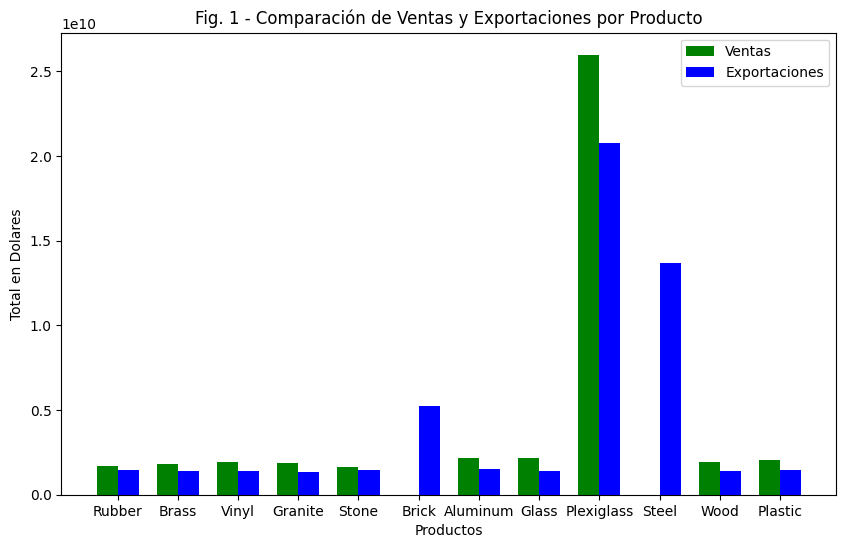

In [ ]:
products = df_sales_in_paraguay.columns.tolist()
sales_values = df_sales_in_paraguay.loc['Total'].values.tolist()
exports_values = df_exports_to_paraguay.loc['Total'].values.tolist()

values = [sales_values, exports_values]
print(products)
print(sales_values)
print(exports_values)

x = np.arange(len(products))  # Posición en el eje X
width = 0.35  # Ancho de las barras

fig, gra = plt.subplots(figsize=(10, 6))
bars1 = gra.bar(x - width/2, sales_values, width, label='Ventas', color='green')
bars2 = gra.bar(x + width/2, exports_values, width, label='Exportaciones', color='blue')

# Añadir etiquetas, título y leyenda
gra.set_xlabel('Productos')
gra.set_ylabel('Total en Dolares')
gra.set_title('Fig. 1 - Comparación de Ventas y Exportaciones por Producto')
gra.set_xticks(x)
gra.set_xticklabels(products)
gra.legend()

plt.show()

## Ranking de Exportaciones

In [ ]:
# Ranking de exportaciones

df_temp2.loc['Total'].sort_values(ascending=False)

## Ciudades con venta de Bricks y Steel

In [ ]:
# ciudades en las que se venden Bricks y Steel

display(df_locations_profiles[(df_locations_profiles['activities'].str.contains('Brick', case=False, na=False)) |
                              (df_locations_profiles['activities'].str.contains('Steel',case=False, na=False))])

# CONCLUSIONES

**Conclusiones**


*   Se realizó una exportación ineficiente de dos productos (Bricks, Steel) que representa casi el 40% de lo exportado y no relacionada con la demanda.

*   De las diez ciudades en las que hay representación sólo dos venden estos productos.


**Explicación de las conclusiones**


En la Fig. 1 se puede observar que los únicos dos productos en los que las exportaciones son sumamente mayores a las ventas son:

*   Steel (acero): puesto 2 del ranking con un total de $ 13.652.930.026,00

*   Brik (ladrillos) : puesto 3 del ranking con un total de $ 5.260.549.009,00


Esto por un lado representa casi el 40% de lo exportado y, además, de manera ineficiente.


Por otro lado, si revisamos en cuántas ciudades en las que la empresa está presente se venden estos dos productos importados podremos ver que sólo en dos de las diez ciudades en las que la empresa tiene representación se venden ladrillos y acero. Ellas son:


*   Tobatí, en el departamento de Cordillera

*   Villa Hayes, en el departamento de Presidente Hayes

